# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import Api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={Api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={Api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | safi
Processing Record 6 of Set 1 | sheridan
Processing Record 7 of Set 1 | kantilo
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | palasa
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | zeya
Processing Record 15 of Set 1 | jean-rabel
Processing Record 16 of Set 1 | ylivieska
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | yelizovo
Processing Record 19 of Set 1 | vilyuysk
Processing Record 20 of Set 1 | lospalos
Processing Record 21 of Set 1 | pavlovsk
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,79,100,3.58,NZ,1696553197
1,qaqortoq,60.7167,-46.0333,2.56,65,88,2.13,GL,1696553197
2,grytviken,-54.2811,-36.5092,3.49,98,100,1.10,GS,1696553197
3,adamstown,-25.0660,-130.1015,20.63,76,3,6.58,PN,1696553198
4,safi,32.1667,-8.8333,23.30,44,100,1.38,MA,1696553198


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,79,100,3.58,NZ,1696553197
1,qaqortoq,60.7167,-46.0333,2.56,65,88,2.13,GL,1696553197
2,grytviken,-54.2811,-36.5092,3.49,98,100,1.10,GS,1696553197
3,adamstown,-25.0660,-130.1015,20.63,76,3,6.58,PN,1696553198
4,safi,32.1667,-8.8333,23.30,44,100,1.38,MA,1696553198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

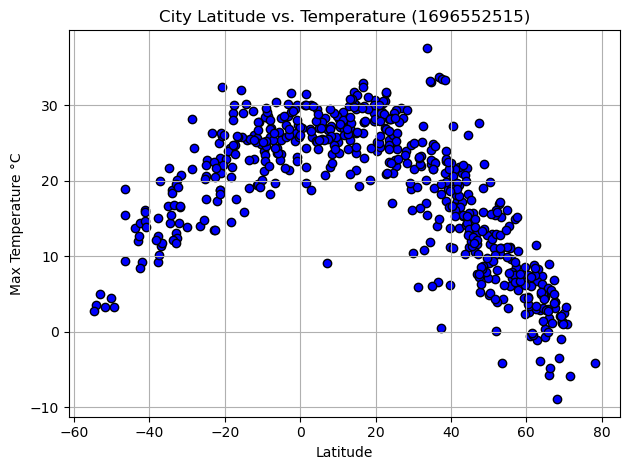

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

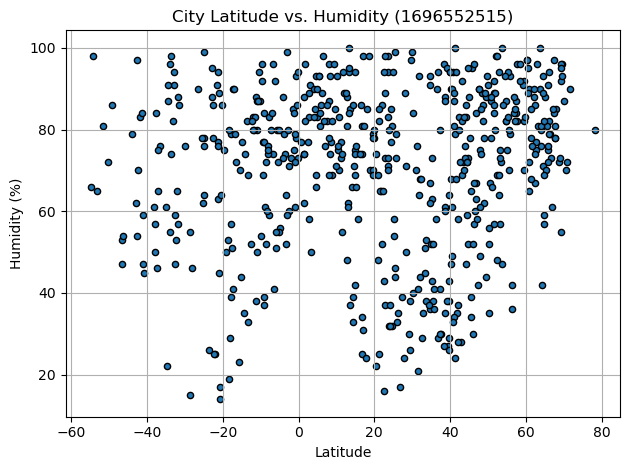

In [25]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

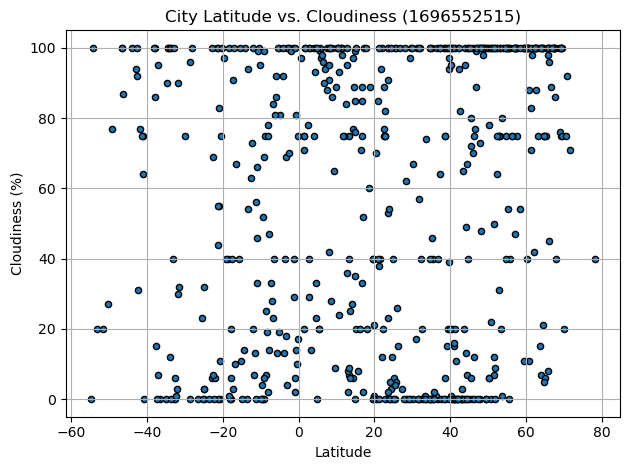

In [26]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

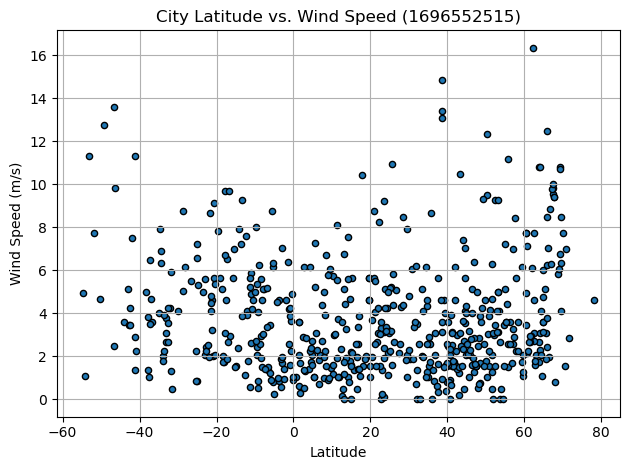

In [27]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,2.56,65,88,2.13,GL,1696553197
4,safi,32.1667,-8.8333,23.30,44,100,1.38,MA,1696553198
5,sheridan,44.8333,-106.9173,11.21,73,100,2.06,US,1696553198
6,kantilo,20.3500,85.1833,23.90,74,70,1.95,IN,1696553198
7,bethel,41.3712,-73.4140,19.05,79,0,1.54,US,1696553198


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,79,100,3.58,NZ,1696553197
2,grytviken,-54.2811,-36.5092,3.49,98,100,1.10,GS,1696553197
3,adamstown,-25.0660,-130.1015,20.63,76,3,6.58,PN,1696553198
8,sao joao da barra,-21.6403,-41.0511,25.05,91,100,8.67,BR,1696553198
10,hithadhoo,-0.6000,73.0833,27.31,78,81,3.66,MV,1696553198


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.43x + 33.16
The r-value is: -0.853048542005904


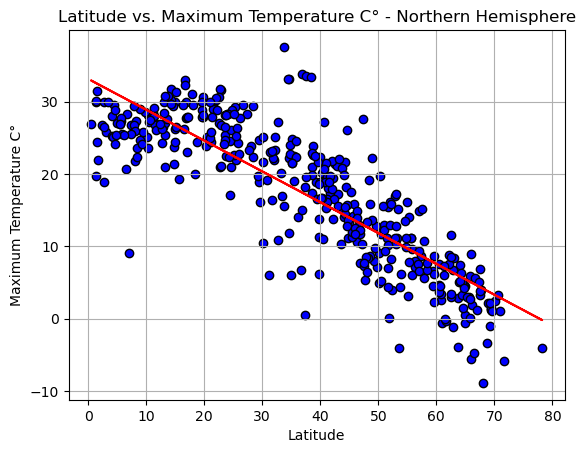

In [56]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.11x + 70.74
The r-value is: 0.0767577926634083


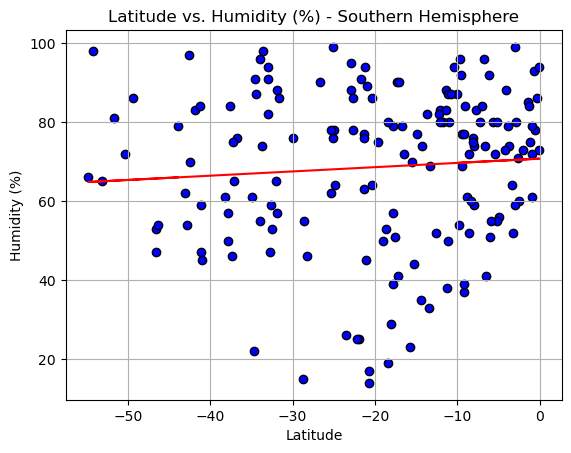

In [53]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.27x + 49.46
The r-value is: 0.1282681933205698


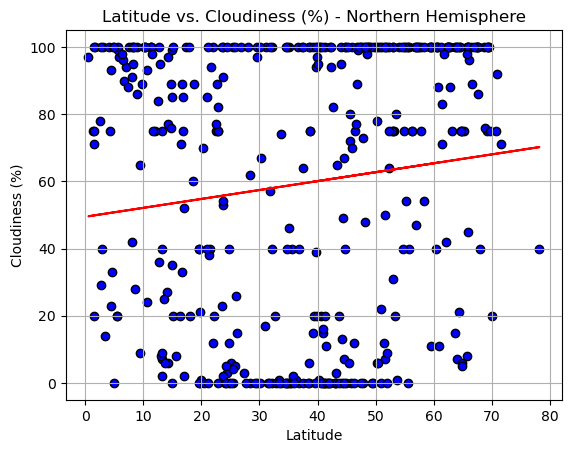

In [44]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.11x + 46.06
The r-value is: -0.04031050928364501


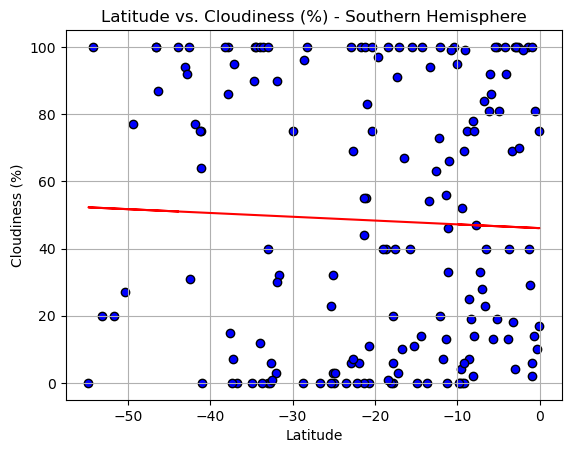

In [45]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.04x + 2.23
The r-value is: 0.25167298792686504


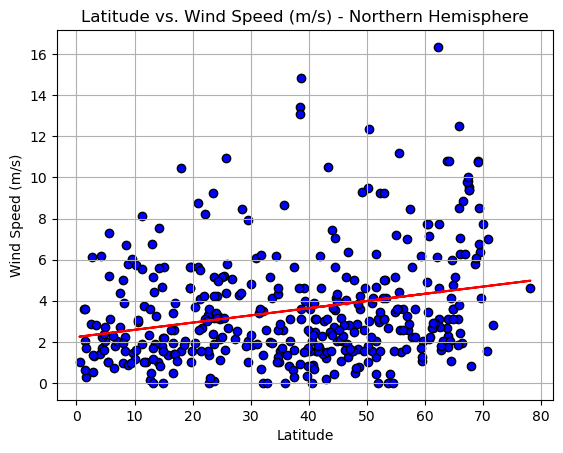

In [46]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.05x + 3.16
The r-value is: -0.264206774232018


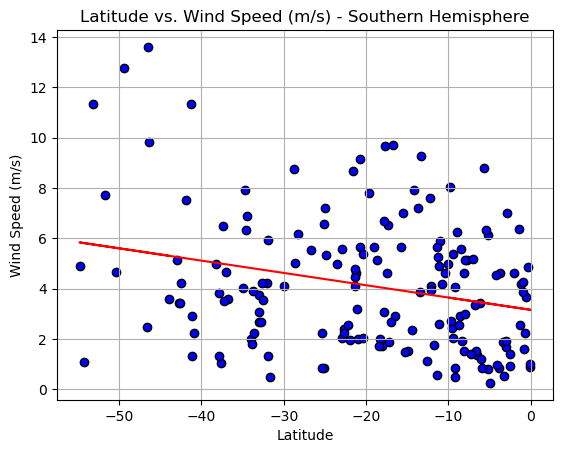

In [47]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE